<a href="https://colab.research.google.com/github/AayushPaigwar/-CodeClause-Churn_Prediction/blob/master/Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


In [ ]:
data_churn= pd.read_csv("/content/churn_data.csv")
data_churn.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
data_churn.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
data_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
data_churn.TotalCharges = pd.to_numeric(data_churn.TotalCharges, errors='coerce')
data_churn.isnull().sum()  #number of null values


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
#Removing missing values
data_churn.dropna(inplace = True)

#Customer ID removing
df=data_churn.iloc[:,1:]

#converting the predictor variable in binary form(0,1)

df['Churn'].replace(to_replace='Yes', value=1, inplace= True)
df['Churn'].replace(to_replace='No', value=0,inplace= True)
df['Churn'].head()


0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [ ]:
#converting all the categorial variable into dummy variables
df_dummy= pd.get_dummies(df)
df_dummy.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [ ]:
df_dummy.dtypes

SeniorCitizen                                int64
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
gender_Female                                uint8
gender_Male                                  uint8
Partner_No                                   uint8
Partner_Yes                                  uint8
Dependents_No                                uint8
Dependents_Yes                               uint8
PhoneService_No                              uint8
PhoneService_Yes                             uint8
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No              

#Performing **Exploratory Data Analysis(EDA)**

<Axes: >

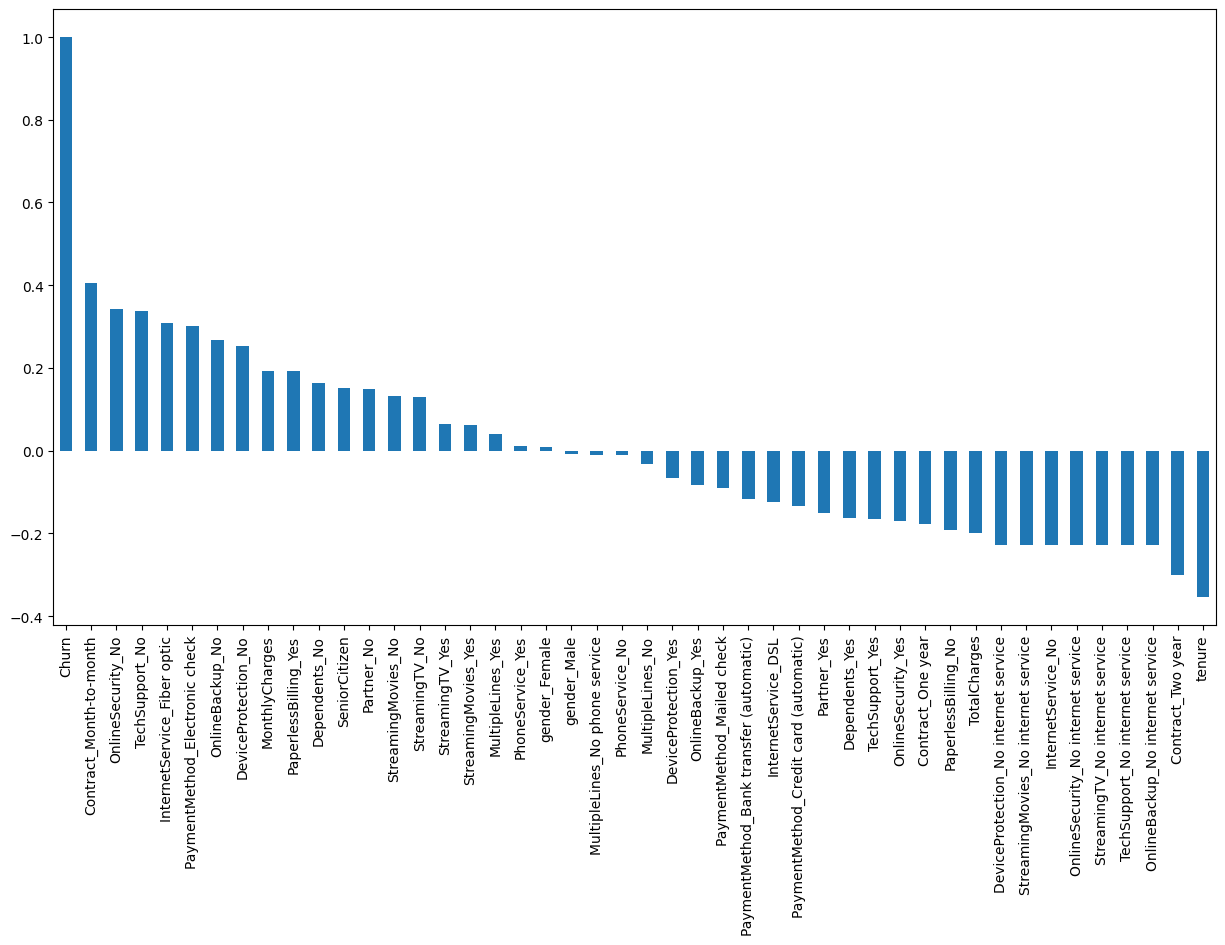

In [ ]:
#get correlation of the churn with other variables
plt.figure(figsize=(15,8))
df_dummy.corr()['Churn'].sort_values(ascending= False).plot(kind= 'bar')

##**Gender Distribution**

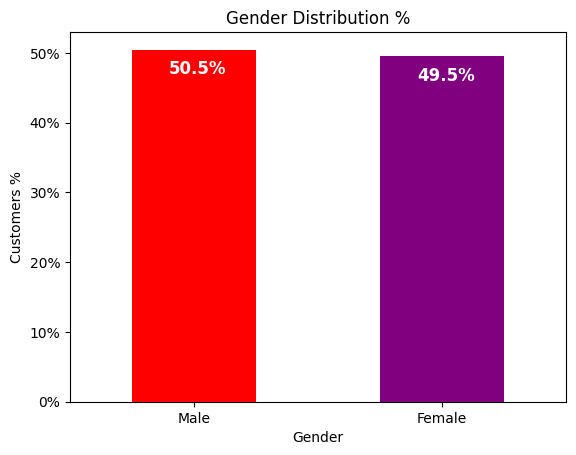

In [ ]:
colors =['red','purple']
gen= (data_churn['gender'].value_counts()*100.0 / len(data_churn)).plot(kind= 'bar', stacked= True, rot= 0, color=colors)
gen.yaxis.set_major_formatter(mtick.PercentFormatter())
gen.set_ylabel('Customers %')
gen.set_xlabel('Gender')
gen.set_title('Gender Distribution %')

total=[]

for i in gen.patches:
  total.append(i.get_width())

total=sum(total)

for i in gen.patches:
  gen.text(i.get_x()+.15,i.get_height()-3.5, str(round((i.get_height()/total),1))+'%', fontsize=12, color='white',weight= 'bold' )


##**Senior Citizens**

Text(0, 0.5, 'Senior Citiizens')

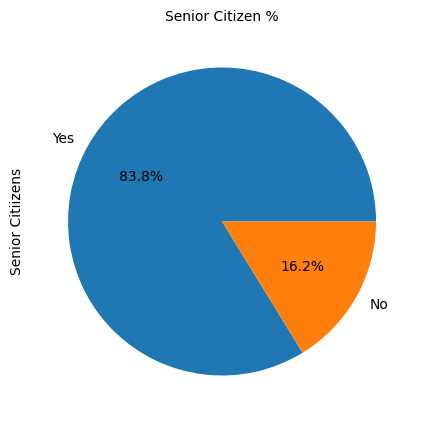

In [ ]:
gen =(data_churn['SeniorCitizen'].value_counts()*100.0/ len(data_churn)).\
plot.pie(autopct='%.1f%%', labels= ['Yes', 'No'], figsize=(5,5) , fontsize= 10)
gen.set_title('Senior Citizen %', fontsize= 10)
gen.set_ylabel('Senior Citiizens', fontsize=10)


##**Dependant and Independant partner**

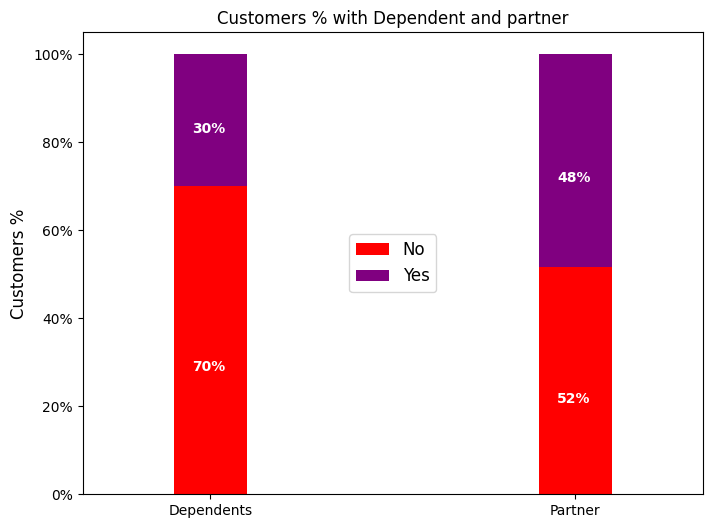

In [ ]:
df2 = pd.melt(data_churn, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df3= df2.groupby(['variable','value']).count().unstack()
df3= df3*100/len(data_churn)
gen= df3.loc[:,'customerID'].plot.bar(stacked=True, color=colors, figsize=(8,6),rot=0,width= 0.2)

gen.yaxis.set_major_formatter(mtick.PercentFormatter())
gen.set_ylabel( 'Customers %', size=12)
gen.set_xlabel('')
gen.set_title('Customers % with Dependent and partner')
gen.legend(loc='center',prop={'size':12})

for j in gen.patches:
  width,height= j.get_width(),j.get_height()
  x,y=j.get_xy()
  gen.annotate('{:.0f}%'.format(height),(j.get_x()+.25*width,j.get_y()+.4*height),\
                 color = 'white',weight='bold',size=10)

##**Tenure**

<ipython-input-54-876ad9b09ee7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  gen= sns.distplot(data_churn['tenure'],hist=True,kde=False,


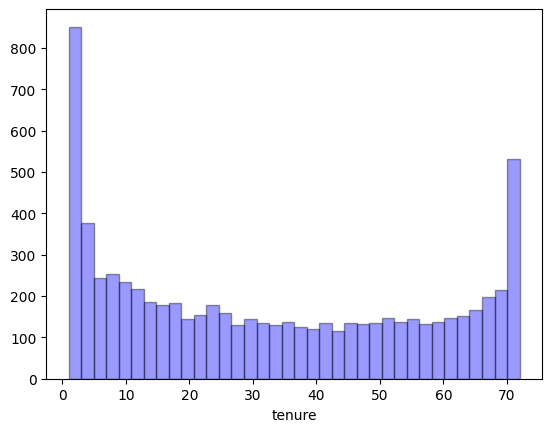

In [ ]:
gen= sns.distplot(data_churn['tenure'],hist=True,kde=False,
             bins=int(180/5),color= 'blue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':10})


##**Number of Contracts**

Text(0.5, 0, 'Contract type')

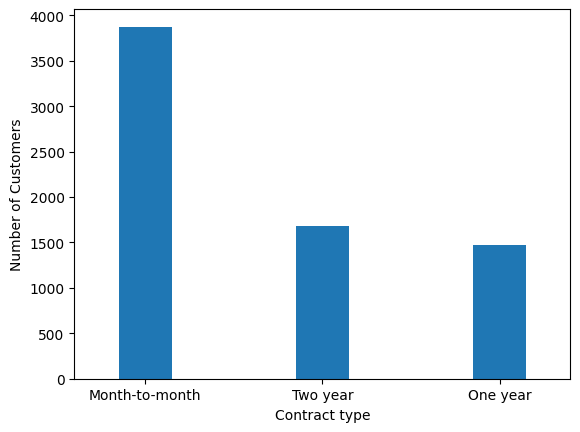

In [ ]:
gen = data_churn['Contract'].value_counts().plot(kind = 'bar', rot = 0, width = 0.3)
gen.set_ylabel('Number of Customers')
gen.set_xlabel('Contract type')


##**Separate Contracts (Month-to-month, 1 year , 2 year)**

<ipython-input-84-217a278c7e53>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_churn[data_churn['Contract']== 'Month-to-month']['tenure'],
<ipython-input-84-217a278c7e53>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax= sns.distplot(data_churn[data_churn['Contract']=='One year']['tenure'],
<

Text(0.5, 1.0, 'Two year Contract')

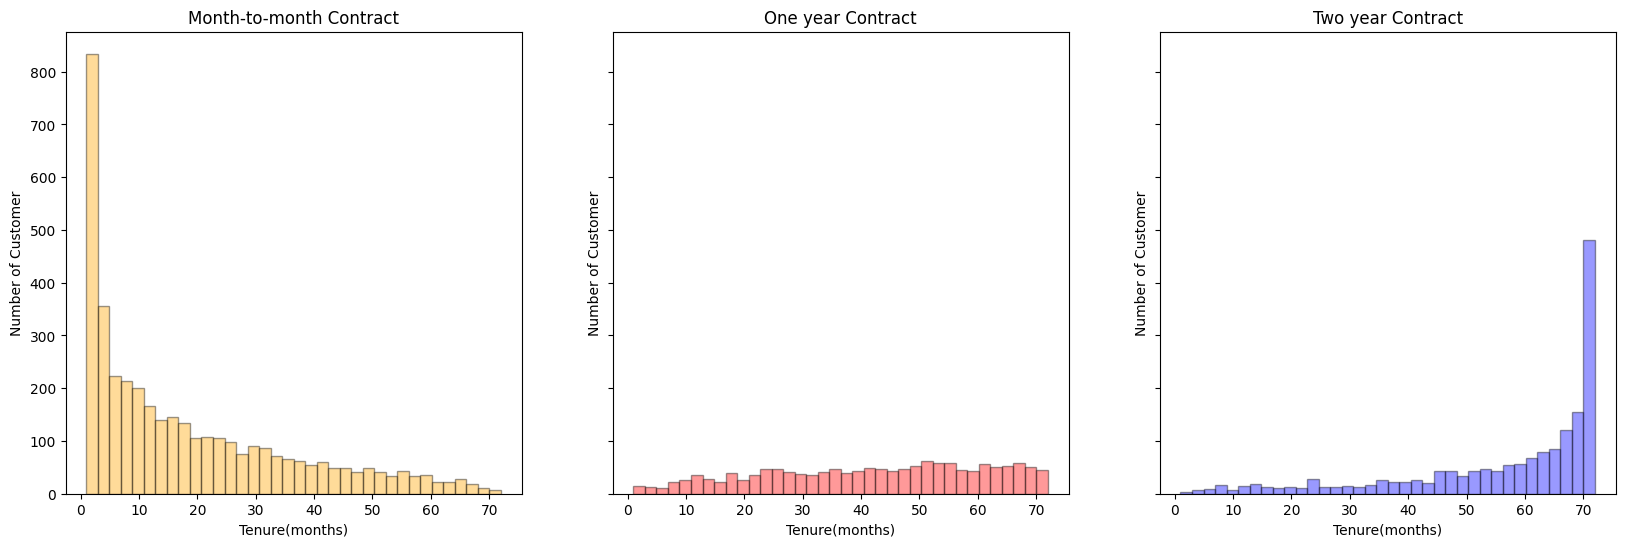

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,sharey=True, figsize=(20,6))

ax = sns.distplot(data_churn[data_churn['Contract']== 'Month-to-month']['tenure'],
                  hist=True ,kde= False,
                  bins= int(180/5),color='orange',
                  hist_kws={'edgecolor':'black'},
                  kde_kws={'linewidth':4},
                  ax=ax1)
ax.set_ylabel('Number of Customer')
ax.set_xlabel('Tenure(months)')
ax.set_title('Month-to-month Contract')

ax= sns.distplot(data_churn[data_churn['Contract']=='One year']['tenure'],
                 hist=True, kde=False,
                 bins=int(180/5),color='red',
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'lineiwidth':4},
                 ax=ax2)
ax.set_ylabel('Number of Customer')
ax.set_xlabel('Tenure(months)')
ax.set_title('One year Contract')

ax= sns.distplot(data_churn[data_churn['Contract']=='Two year']['tenure'],
                 hist=True, kde=False,
                 bins=int(180/5),color='blue',
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'lineiwidth':4},
                 ax=ax3)
ax.set_ylabel('Number of Customer')
ax.set_xlabel('Tenure(months)')
ax.set_title('Two year Contract')



##**List of services used by customers**

In [ ]:
data_churn.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
services =['PhoneService', 'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
           'TechSupport','StreamingTV','StreamingMovies']

##**Monthly & Total Charges**

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

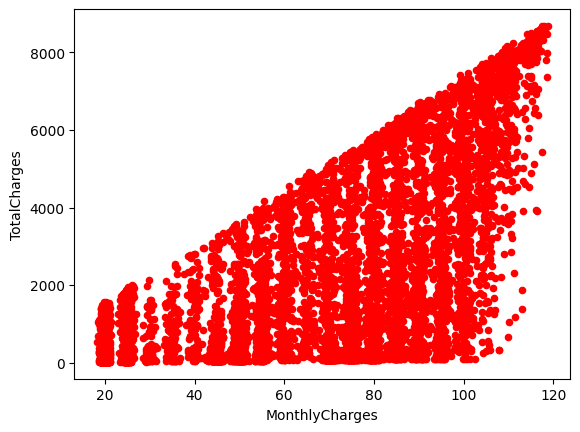

In [ ]:
data_churn[['MonthlyCharges','TotalCharges']].plot.scatter(x='MonthlyCharges', y='TotalCharges', color='red')

##**Churn Rate**